In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing
import scipy.stats as stats
import pylab as py

In [3]:
#image with close cropping of bee
few_hair = pd.read_csv("FH_Results.csv", index_col = False )
high_middle = pd.read_csv("HM_Results.csv",index_col = False)
low_middle= pd.read_csv("LM_Results.csv", index_col = False)
very_hairy = pd.read_csv("VH_Results.csv", index_col = False)

#image with close cropping of bee + entropy calculation using grayscale
few_hair_gray = pd.read_csv("FH_Results_gray.csv", index_col = False )
high_middle_gray = pd.read_csv("HM_Results_gray.csv",index_col = False)
low_middle_gray= pd.read_csv("LM_Results_gray.csv", index_col = False)
very_hairy_gray = pd.read_csv("VH_Results_gray.csv", index_col = False)

#image with no cropping(full image)
few_hair_full = pd.read_csv("FH_Results_full.csv", index_col = False )
high_middle_full = pd.read_csv("HM_Results_full.csv",index_col = False)
low_middle_full= pd.read_csv("LM_Results_full.csv", index_col = False)
very_hairy_full = pd.read_csv("VH_Results_full.csv", index_col = False)

#image with no cropping(full image) + entropy calculation using grayscale
few_hair_full_gray = pd.read_csv("FH_Results_full_gray.csv", index_col = False )
high_middle_full_gray = pd.read_csv("HM_Results_full_gray.csv",index_col = False)
low_middle_full_gray= pd.read_csv("LM_Results_full_gray.csv", index_col = False)
very_hairy_full_gray = pd.read_csv("VH_Results_full_gray.csv", index_col = False)


D:\anaconda3\New\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [4]:
#concatenate each set (4 sets)
#see how Python groups them
#look at each group and compare with manual grouping

all_results = pd.concat([few_hair, high_middle,low_middle,very_hairy])
all_results = all_results.sort_values(by=["Reg1AvgEntropy"])
all_results.reset_index(drop=True, inplace=True)
all_results


,FileName,Reg1AvgEntropy,Reg1StdEntropy,Reg1Area,Reg2AvgEntropy,Reg2StdEntropy,Reg2Area,Reg3AvgEntropy,Reg3StdEntropy,Reg3Area,Reg4AvgEntropy,Reg4StdEntropy,Reg4AreaProcTime(s)
0,E_SEMC1167976_Xenostelis_polychroma_female_lat...,113.040,75.468,6935425.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FDP95332_Megachile_Dasymegachile_sauleyi_femal...,144.553,75.724,2611640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Holo86_Larinostelis_scapulata_female_lateralha...,146.957,71.881,4034986.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,E_SEMC1104686_Heriadopsis_female_lateralhabitu...,147.545,78.650,5331720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SEMC1165742_Acedanthidium_lateralhabitus_black...,149.706,81.119,3620419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,E_SEMC0976296_Prodioxys_carnea_female_Lateralh...,149.882,84.029,4616469.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,BSLID827035_Pseudoanthidium_truncatum_female_l...,153.169,81.587,4071092.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,BBSLID830831_Megachile_MAXIMEGACHILE_maxillosa...,156.649,75.722,1588566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,BBSLID827091_Pachyanthidium_semiluteum_female_...,157.392,63.708,1739931.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,SEMC1102235_Osmia_longicornis_male_lateralhabi...,161.522,78.996,3235470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#identify the outlier
#exploratory to see if outliers have effect
#scenario 1: remove outliers for each subset, rerun tests
#scenario 2: move outliers/extreme points to different bin

#full images
few_hair_full = few_hair_full.loc[few_hair_full["Reg1AvgEntropy"] != few_hair_full["Reg1AvgEntropy"].max()]
few_hair_full = few_hair_full.loc[few_hair_full["Reg1AvgEntropy"] != few_hair_full["Reg1AvgEntropy"].min()]
few_hair_full_gray = few_hair_full.loc[few_hair_full["Reg1AvgEntropy"] != few_hair_full["Reg1AvgEntropy"].max()]

# cropped images
few_hair = few_hair.loc[few_hair["Reg1AvgEntropy"] != few_hair["Reg1AvgEntropy"].min()]
few_hair_gray =  few_hair_gray.loc[few_hair_gray["Reg1AvgEntropy"] != few_hair_gray["Reg1AvgEntropy"].min()]
few_hair_gray =  few_hair_gray.loc[few_hair_gray["Reg1AvgEntropy"] != few_hair_gray["Reg1AvgEntropy"].max()]
very_hairy = very_hairy.loc[very_hairy["Reg1AvgEntropy"] != very_hairy["Reg1AvgEntropy"].max()]
very_hairy = very_hairy.loc[very_hairy["Reg1AvgEntropy"] != very_hairy["Reg1AvgEntropy"].min()]
very_hairy_gray = very_hairy_gray.loc[very_hairy_gray["Reg1AvgEntropy"] != very_hairy_gray["Reg1AvgEntropy"].min()]

#re-test everything using updating csv

[Text(1, 0, 'few_hair'),
 Text(2, 0, 'low_middle'),
 Text(3, 0, 'high_middle'),
 Text(4, 0, 'very_hairy')]

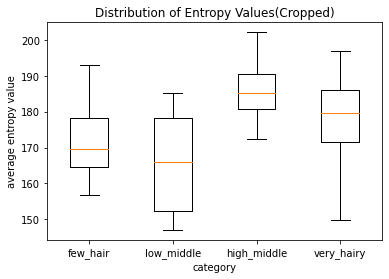

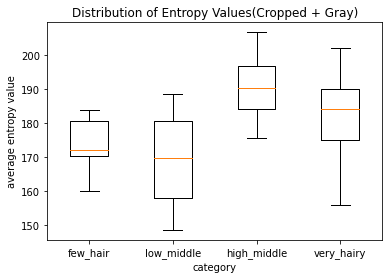

In [6]:
#create dictionary with label as key, entropy values as value
entropy_dict = {}
entropy_dict["few_hair"] = few_hair.Reg1AvgEntropy.values
entropy_dict["low_middle"] = low_middle.Reg1AvgEntropy.values
entropy_dict["high_middle"] = high_middle.Reg1AvgEntropy.values
entropy_dict["very_hairy"] = very_hairy.Reg1AvgEntropy.values

entropy_dict_gray = {}
entropy_dict_gray["few_hair"] = few_hair_gray.Reg1AvgEntropy.values
entropy_dict_gray["low_middle"] = low_middle_gray.Reg1AvgEntropy.values
entropy_dict_gray["high_middle"] = high_middle_gray.Reg1AvgEntropy.values
entropy_dict_gray["very_hairy"] = very_hairy_gray.Reg1AvgEntropy.values

entropy_dict_full = {}
entropy_dict_full["few_hair"] = few_hair_full.Reg1AvgEntropy.values
entropy_dict_full["low_middle"] = low_middle_full.Reg1AvgEntropy.values
entropy_dict_full["high_middle"] = high_middle_full.Reg1AvgEntropy.values
entropy_dict_full["very_hairy"] = very_hairy_full.Reg1AvgEntropy.values

entropy_dict_full_gray  = {}
entropy_dict_full_gray["few_hair"] = few_hair_full_gray.Reg1AvgEntropy.values
entropy_dict_full_gray["low_middle"] = low_middle_full_gray.Reg1AvgEntropy.values
entropy_dict_full_gray["high_middle"] = high_middle_full_gray.Reg1AvgEntropy.values
entropy_dict_full_gray["very_hairy"] = very_hairy_full_gray.Reg1AvgEntropy.values

fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Cropped)")
ax.boxplot(entropy_dict.values())
ax.set_xticklabels(entropy_dict.keys())

fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Cropped + Gray)")
ax.boxplot(entropy_dict_gray.values())
ax.set_xticklabels(entropy_dict_gray.keys())

[Text(1, 0, 'few_hair'),
 Text(2, 0, 'low_middle'),
 Text(3, 0, 'high_middle'),
 Text(4, 0, 'very_hairy')]

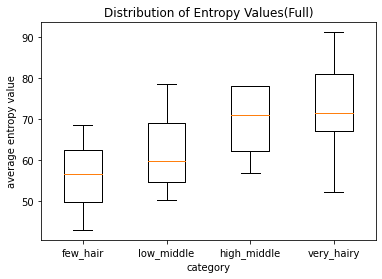

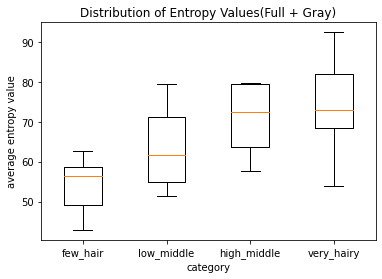

In [7]:
fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Full)")
ax.boxplot(entropy_dict_full.values())
ax.set_xticklabels(entropy_dict_full.keys())

fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Full + Gray)")
ax.boxplot(entropy_dict_full_gray.values())
ax.set_xticklabels(entropy_dict_full_gray.keys())

In [8]:
#combining middle hairs ( low middle & high middle)
M_results = pd.concat([low_middle, high_middle])
M_results.reset_index(drop=True, inplace=True)
M_results.to_csv("MH_results.csv", index = False)

M_results_gray = pd.concat([low_middle_gray,high_middle_gray])
M_results_gray.reset_index(drop=True, inplace=True)
M_results_gray.to_csv("MH_results_gray.csv",index = False)

M_results_full = pd.concat([low_middle_full,high_middle_full])
M_results_full.reset_index(drop=True, inplace=True)
M_results_full.to_csv("MH_results_full.csv",index = False)

M_results_full_gray = pd.concat([low_middle_full_gray,high_middle_full_gray])
M_results_full_gray.reset_index(drop=True, inplace=True)
M_results_full_gray.to_csv("MH_results_full_gray.csv",index = False)

In [9]:
entropy_dict["middle_hair"] = np.concatenate((entropy_dict["low_middle"],entropy_dict["high_middle"]))
entropy_dict_gray["middle_hair"] = np.concatenate((entropy_dict_gray["low_middle"],entropy_dict_gray["high_middle"]))
entropy_dict_full["middle_hair"] = np.concatenate((entropy_dict_full["low_middle"],entropy_dict_full["high_middle"]))
entropy_dict_full_gray["middle_hair"] = np.concatenate((entropy_dict_full_gray["low_middle"],entropy_dict_full_gray["high_middle"]))

In [10]:
#removing low and high middles

entropy_dict.pop("low_middle")
entropy_dict.pop("high_middle")
x = entropy_dict.pop("very_hairy")
entropy_dict["very_hairy"] = x 

entropy_dict_gray.pop("low_middle")
entropy_dict_gray.pop("high_middle")
x = entropy_dict_gray.pop("very_hairy")
entropy_dict_gray["very_hairy"] = x 

entropy_dict_full.pop("low_middle")
entropy_dict_full.pop("high_middle")
x = entropy_dict_full.pop("very_hairy")
entropy_dict_full["very_hairy"] = x 

entropy_dict_full_gray.pop("low_middle")
entropy_dict_full_gray.pop("high_middle")
x = entropy_dict_full_gray.pop("very_hairy")
entropy_dict_full_gray["very_hairy"] = x 

[Text(1, 0, 'few_hair'), Text(2, 0, 'middle_hair'), Text(3, 0, 'very_hairy')]

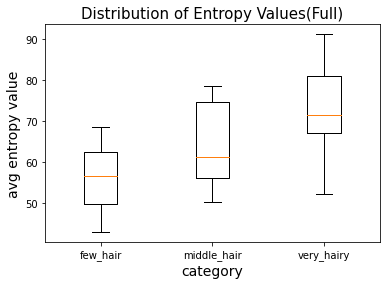

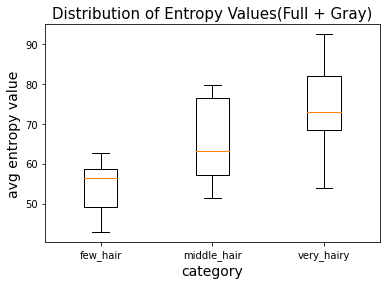

In [23]:
fig, ax = plt.subplots()
axes = plt.gca()

axes.xaxis.label.set_size(14)
axes.yaxis.label.set_size(14)

plt.xlabel('category') 
plt.ylabel('avg entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Full)", fontsize = 15)
ax.boxplot(entropy_dict_full.values())
ax.set_xticklabels(entropy_dict_full.keys())

fig, ax = plt.subplots()
axes = plt.gca()

axes.xaxis.label.set_size(14)
axes.yaxis.label.set_size(14)
plt.xlabel('category') 
plt.ylabel('avg entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Full + Gray)", fontsize = 15)
ax.boxplot(entropy_dict_full_gray.values())
ax.set_xticklabels(entropy_dict_full_gray.keys())

[Text(1, 0, 'few_hair'), Text(2, 0, 'middle_hair'), Text(3, 0, 'very_hairy')]

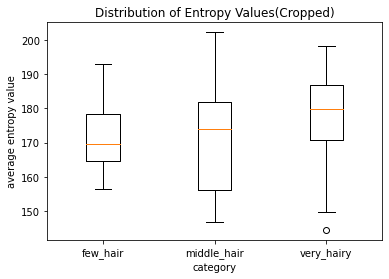

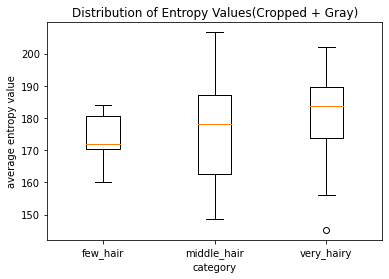

In [92]:
fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Cropped)")
ax.boxplot(entropy_dict.values())
ax.set_xticklabels(entropy_dict.keys())

fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Cropped + Gray)")
ax.boxplot(entropy_dict_gray.values())
ax.set_xticklabels(entropy_dict_gray.keys())

0.6588138341903687
0.8669253587722778
0.5729722380638123
0.5934628248214722
0.4545149505138397
0.6934915781021118
0.06609923392534256
0.07213295996189117


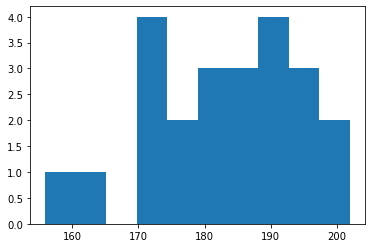

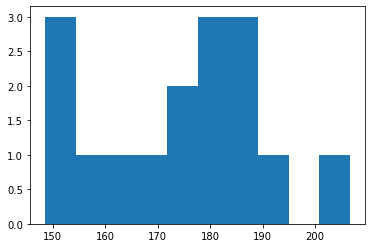

In [115]:
#very_hairy vs M_results
#very_hairy_gray vs M_results_gray
#very_hairy_full vs M_results_full
#very_hairy_full_gray vs M_results_full_gray

#check normality
#check histogram

fig, ax = plt.subplots()
ax.hist(very_hairy_gray["Reg1AvgEntropy"])
ig, ax = plt.subplots()
ax.hist(M_results_gray["Reg1AvgEntropy"])

#check Shapiro-Wilk test
#null:population is normally distributed
#alternative: data is not normally distributed

#very hair

w, pvalue = stats.shapiro(very_hairy["Reg1AvgEntropy"])
print(pvalue)

w, pvalue = stats.shapiro(very_hairy_gray["Reg1AvgEntropy"])
print(pvalue)

w, pvalue = stats.shapiro(very_hairy_full["Reg1AvgEntropy"])
print(pvalue)

w, pvalue = stats.shapiro(very_hairy_full_gray["Reg1AvgEntropy"])
print(pvalue)

#middle hair
w, pvalue = stats.shapiro(M_results["Reg1AvgEntropy"])
print(pvalue)
w, pvalue = stats.shapiro(M_results_gray["Reg1AvgEntropy"])
print(pvalue)
w, pvalue = stats.shapiro(M_results_full["Reg1AvgEntropy"])
print(pvalue)
w, pvalue = stats.shapiro(M_results_full_gray["Reg1AvgEntropy"])
print(pvalue)


#print(pvalue)
#all fail to reject, do not have sufficient evidence to conclude that data is not normally distributed 

D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The ke

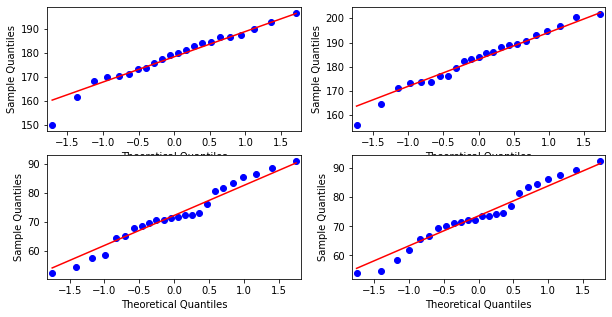

In [116]:
#very_hairy vs M_results
#very_hairy_gray vs M_results_gray
#very_hairy_full vs M_results_full
#very_hairy_full_gray vs M_results_full_gray

#check qqplot
#very-hairy
fig, ax = plt.subplots(2,2,figsize=(10,5))

sm.qqplot(very_hairy["Reg1AvgEntropy"], line = "s",ax = ax[0][0])
sm.qqplot(very_hairy_gray["Reg1AvgEntropy"], line = "s", ax = ax[0][1])
sm.qqplot(very_hairy_full["Reg1AvgEntropy"], line = "s", ax = ax[1][0])
sm.qqplot(very_hairy_full_gray["Reg1AvgEntropy"], line = "s", ax = ax[1][1])
py.show()


D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The ke

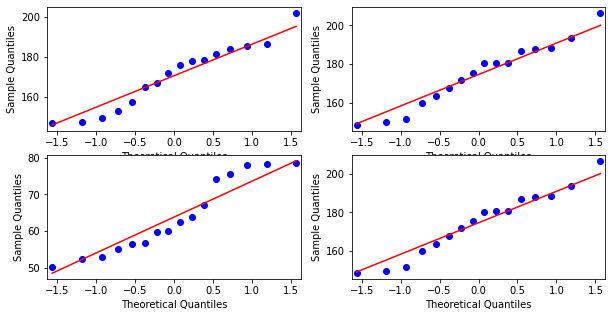

In [117]:
fig, ax = plt.subplots(2,2,figsize=(10,5))

sm.qqplot(M_results["Reg1AvgEntropy"], line = "s",ax = ax[0][0])
sm.qqplot(M_results_gray["Reg1AvgEntropy"], line = "s", ax = ax[0][1])
sm.qqplot(M_results_full["Reg1AvgEntropy"], line = "s", ax = ax[1][0])
sm.qqplot(M_results_gray["Reg1AvgEntropy"], line = "s", ax = ax[1][1])
py.show()

In [118]:
#check variance
#rule of thumb: ratio of variances <4 (larger/smaller), assume equal variances
print(np.var(very_hairy["Reg1AvgEntropy"]), np.var(M_results["Reg1AvgEntropy"]))
print(np.var(very_hairy_gray["Reg1AvgEntropy"]), np.var(M_results_gray["Reg1AvgEntropy"]))
print(np.var(very_hairy_full["Reg1AvgEntropy"]), np.var(M_results_full["Reg1AvgEntropy"]))
print(np.var(very_hairy_full_gray["Reg1AvgEntropy"]), np.var(M_results_full_gray["Reg1AvgEntropy"]))

111.89633793595043 247.65656287500005
124.06220512665408 263.76787374609364
108.49442612326386 95.08587880859373
105.66939088888888 98.98658585937501


In [119]:
#perform two sample t-test with equal variances

#null hypothesis: the means of the distributions are equal
#alternative: the mean of entropy value for hairy bees is greater than mean of entropy value for middle hairy bees

print(stats.ttest_ind(a=very_hairy["Reg1AvgEntropy"], b=M_results["Reg1AvgEntropy"], equal_var=True, 
                     alternative = "greater"))
#since p-value is large, we fail to reject. Do not have sufficient evidence to show the means of entropy for very hairy 
#is greater than means of entropy for middle hairy

print(stats.ttest_ind(a=very_hairy_gray["Reg1AvgEntropy"], b=M_results_gray["Reg1AvgEntropy"], equal_var=True, 
                     alternative = "greater" ))
#since p-value is large, we fail to reject. Do not have sufficient evidence to show the means of entropy for very hairy 
#is greater than means of entropy for middle hairy

print(stats.ttest_ind(a=very_hairy_full["Reg1AvgEntropy"], b=M_results_full["Reg1AvgEntropy"], equal_var=True, 
                     alternative = "greater"))
#since p-value is small, we reject null hypothesis. Data favors alternative hypothesis.

print(stats.ttest_ind(a=very_hairy_full_gray["Reg1AvgEntropy"], b=M_results_full_gray["Reg1AvgEntropy"], equal_var=True, 
                     alternative = "greater"))
#since p-value is small, we reject null hypothesis. Data favors alternative hypothesis.

Ttest_indResult(statistic=1.7534491880220113, pvalue=0.04401839265897716)
Ttest_indResult(statistic=1.8701059082004956, pvalue=0.03469840419480578)
Ttest_indResult(statistic=2.484552401702546, pvalue=0.008746471095431616)
Ttest_indResult(statistic=2.474565636129937, pvalue=0.008959020399499668)


In [120]:
#perform two sample t-test with Mann-Whitney U Test
#null hypothesis: two groups have the same mean entropy
#alternative: hairier group have a larger average entropy than middle hair group

print(stats.mannwhitneyu(x = very_hairy["Reg1AvgEntropy"] , y = M_results["Reg1AvgEntropy"], alternative = "greater"))
#fail to reject, do not have sufficient evidence to conclude alternative

print(stats.mannwhitneyu(x = very_hairy_gray["Reg1AvgEntropy"] , y = M_results_gray["Reg1AvgEntropy"], alternative = "greater"))
#fail to reject, do not have sufficient evidence to conclude alternative

print(stats.mannwhitneyu(x = very_hairy_full["Reg1AvgEntropy"] , y = M_results_full["Reg1AvgEntropy"], alternative = "greater"))
#reject, data favors alternative

print(stats.mannwhitneyu(x = very_hairy_full_gray["Reg1AvgEntropy"] , y = M_results_full_gray["Reg1AvgEntropy"], alternative = "greater"))
#reject, data favors alternative

MannwhitneyuResult(statistic=229.0, pvalue=0.060307781337872395)
MannwhitneyuResult(statistic=243.0, pvalue=0.0474307329877381)
MannwhitneyuResult(statistic=271.0, pvalue=0.015109091111670938)
MannwhitneyuResult(statistic=272.0, pvalue=0.014088019999978735)
